# Previsão das Vendas Semanais da Renner com Machine Learning
### Utilizando XGBoost para prever as vendas de cada uma das lojas

## Integrantes do Grupo:
- Thiago Macedo
- Vitor Pires
- Lorenzo Lazzarotto
- Gustavo da Nóbrega

## Overview do Projeto
O projeto é composto em criar um modelo de aprendizado de máquina para prever as vendas das próximas 8 semanas de cada uma das lojas da Renner. Os dados que recebemos não continha muitas informações, então, foi elaborada uma pipeline de `ETL` e `Feature Enginnering`, além de uma pipeline de `ML`. As etapas do projeto foram as seguintes:

1. A criação de uma pipeline de ETL que lê e limpa os dados, salvando-os em um novo arquivo csv.
2. A criação de uma pipeline de ML que cria e treina um modelo XGBRegressor para a previsão das vendas.


## Descrição dos Arquivos 
1. data
    - training_data.csv: csv com os dados de treino originais
    - testing_data.csv: csv com os dados de teste originais
    - forecasted_data.csv: csv com as previsões do modelo
2. cleaned_data
    - cleaned_training_data.csv: csv com os dados de treino limpos e features criadas 
    - cleaned_testing_data.csv: csv com os dados de teste limpos e features criadas
3. models
    - model1.pkl: o modelo XGBRegressor treinado e tunado
4. functions
    - etl.py: arquivo python com a funções utilizadas na pipeline de ETL
    - ml.py: arquivo python com as funções utilizadas na pipeline de ML
7. process_data.py
    - A pipeline de ETL em si. Salva os dados limpos na pasta cleaned_data
8. train_forecaster.py
    - A pipeline de ML em si. Salva os dados com as previsões na pasta data e o modelo treinado na pasta models

## Tecnologias Utilizadas 
- Pandas: Processamento dos dados
- NumPy: Cálculos matemáticos
- SKlearn: Métricas e ferramentas para treinamento do modelo
- XGBoost: Modelo de ML
- sys: Entrada de dados nas pipelines
- pickle: Salvamento do Modelo 

## Reconhecimentos 
- Time Series Forecasting with XGBoost from TDS: https://towardsdatascience.com/multi-step-time-series-forecasting-with-xgboost-65d6820bec39
- XGBoost hyperparameter tuning: https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost
- Time Series Forecasting Tutorial: https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost
<
## Instruções 
- 1. Para rodar a pipeline de ETL: `python3 process_data.py data/training_data.csv data/testing_data.csv`
- 2. Para rodar a pipeline de ML: `python3 train_forecaster.py cleaned_data/cleaned_training_data.csv cleaned_data/cleaned_testing_data.csv data/testing.csv models/model.pkl`

### Esse notebook tem como função demonstrar os resultados do projeto, explicando o processo de limpeza dos dados e criação do modelo. 

- **obs**: Não é necessário rodar os arquivos `process_data.py` e `train_forecaster.py`, pois os dados e o modelo ja existem.

## 1. Import das Bibliotecas

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.ml import plot_diagnostics
plt.style.use('fivethirtyeight')

## 2. Leitura dos dados previstos 
- `data/forecasted_data.csv` -> dados previstos
- `data/train.csv` -> dados originais

In [118]:
df = pd.read_csv('data/forecasted_data.csv', index_col='Unnamed: 0')
df.ds = pd.to_datetime(df.ds).dt.date
df.index = pd.to_datetime(df.ds)
df.head()

,item,loja,tipo_loja,ds,venda,ypred,error,sqderror,abserror
ds,,,,,,,,,
2022-04-10,10223,renner_ar_ex_1,física,2022-04-10,12,5.591211,6.408789,41.072572,6.408789
2022-04-17,10223,renner_ar_ex_1,física,2022-04-17,6,6.645389,-0.645389,0.416526,0.645389
2022-04-24,10223,renner_ar_ex_1,física,2022-04-24,4,5.591211,-1.591211,2.531953,1.591211
2022-05-01,10223,renner_ar_ex_1,física,2022-05-01,12,11.055262,0.944738,0.892531,0.944738
2022-05-08,10223,renner_ar_ex_1,física,2022-05-08,2,11.055262,-9.055262,81.997763,9.055262


In [119]:
df_past = pd.read_csv('data/train.csv')
df_past.ds = pd.to_datetime(df_past.ds).dt.date
df_past = df_past.sort_values(by=['loja', 'ds'])
df_past.index = pd.to_datetime(df_past.ds)
df_past = df_past.drop('ds', axis=1)
df_past.head()

,item,loja,tipo_loja,venda
ds,,,,
2019-12-08,10223,renner_ar_ex_1,física,68
2019-12-15,10223,renner_ar_ex_1,física,376
2019-12-22,10223,renner_ar_ex_1,física,345
2019-12-29,10223,renner_ar_ex_1,física,219
2020-01-05,10223,renner_ar_ex_1,física,140


## 3. Resultados do Modelo:
### Métricas:
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)

### Resultdados do Modelo Geral

In [120]:
plot_diagnostics(df['venda'], df['ypred'])

MSE: 4719.33
RMSE: 68.7
MAE: 26.45


No geral, o `RMSE` do modelo é de 68.7. Não é um número muito bom, mas as previsões nas lojas web (que são muito ruins) tem grande influência nisso. 

### Resultados do Modelo somente nas lojas físicas 

In [121]:
df_fisicas = df.loc[df.tipo_loja=='física']
plot_diagnostics(df_fisicas['venda'], df_fisicas['ypred'])

MSE: 1101.42
RMSE: 33.19
MAE: 23.06


Considerando somente as lojas físicas, o modelo tem um `RMSE` de 33.19, ja está bem melhor do que o geral. Novamente, existem lojas físicas que possuem muitas vendas por semana e acabam levando o erro para cima. 

### Resultados do Modelo somente nas lojas digitais (web)

In [122]:
df_web = df.loc[df.tipo_loja=='web']
plot_diagnostics(df_web['venda'], df_web['ypred'])

MSE: 667927.93
RMSE: 817.27
MAE: 647.72


Ao olhar somente as lojas digitais, o `RMSE` é de 817.27 (muito ruim). Isso acontece pois as lojas digitais são séries temporais muito diferentes de resto, fazendo com que o modelo não funcione muito para eles. O melhor seria criar um modelo separado para cada uma delas. 

## 4. Plotagem das previsões

### Previsões das 10 melhores lojas 

renner_ar_ex_4
--------------
MSE: 11.58
RMSE: 3.4
MAE: 2.84


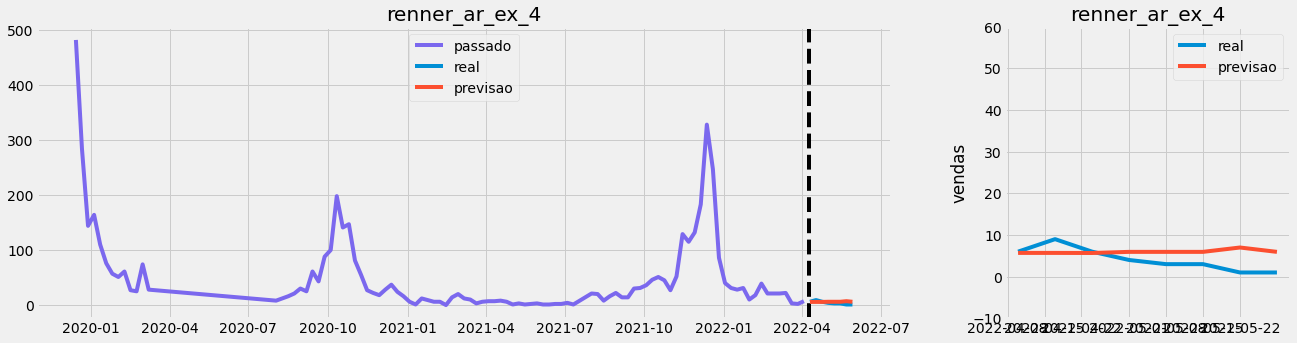

renner_br_sp_40
--------------
MSE: 19.01
RMSE: 4.36
MAE: 3.52


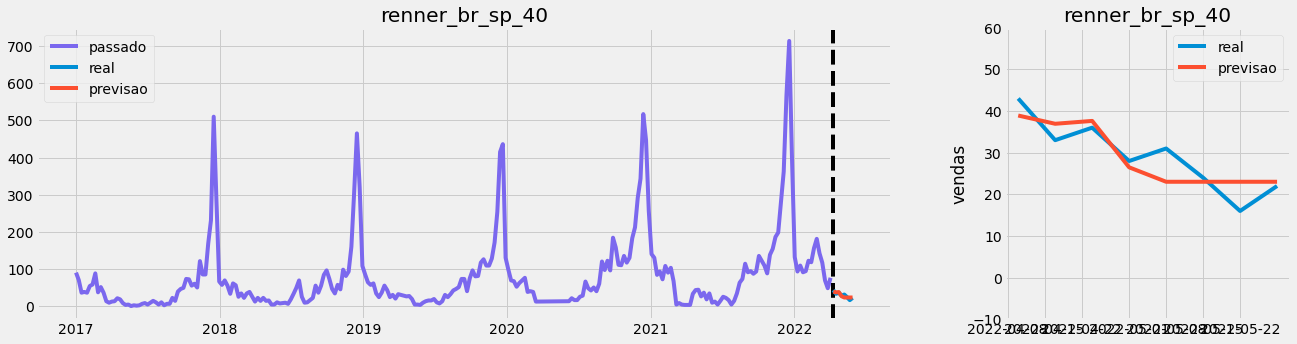

renner_br_sc_50
--------------
MSE: 18.93
RMSE: 4.35
MAE: 3.56


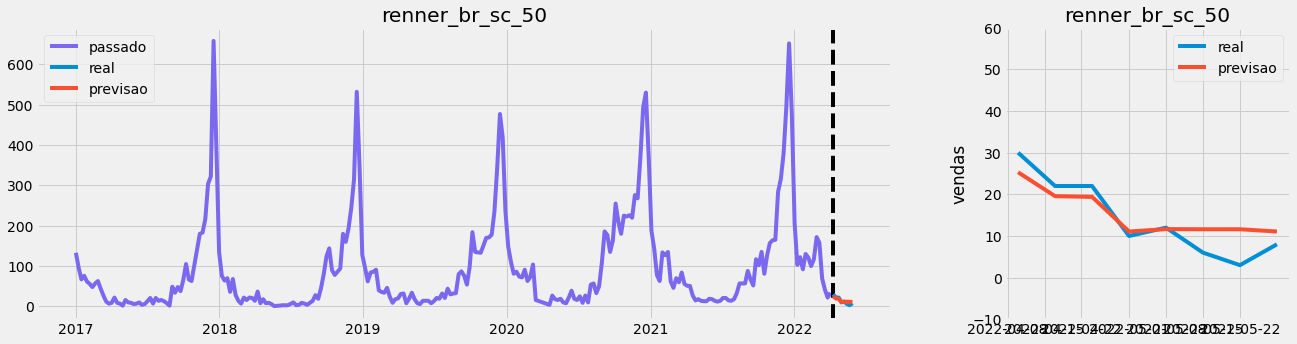

renner_br_rs_3
--------------
MSE: 23.58
RMSE: 4.86
MAE: 4.01


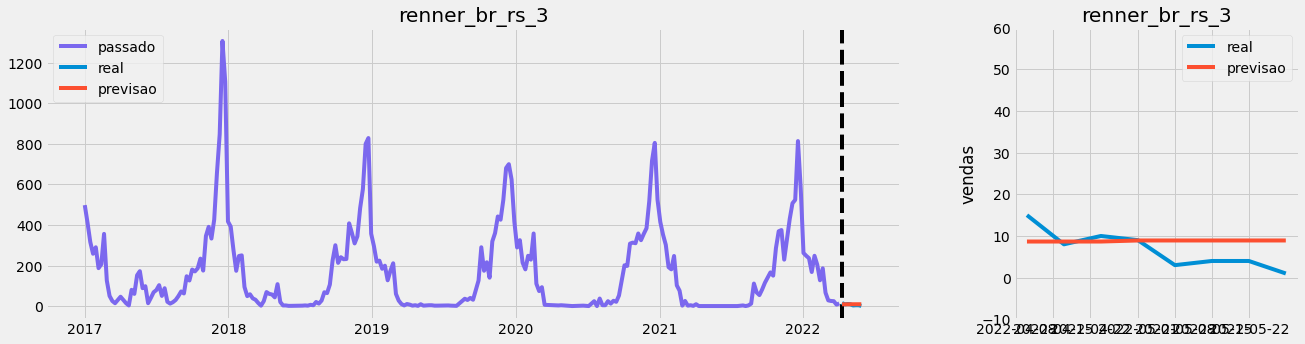

renner_br_pr_33
--------------
MSE: 31.01
RMSE: 5.57
MAE: 4.16


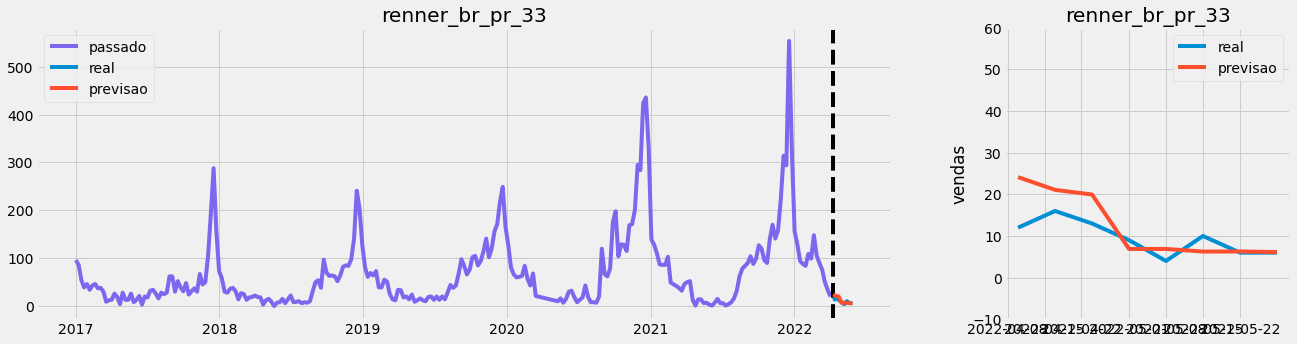

renner_br_rs_34
--------------
MSE: 20.98
RMSE: 4.58
MAE: 4.29


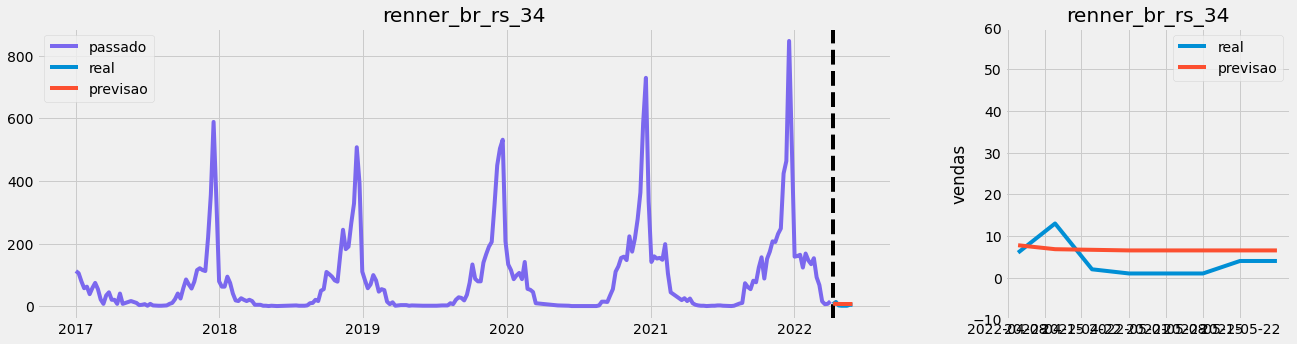

renner_ar_ex_1
--------------
MSE: 30.01
RMSE: 5.48
MAE: 4.45


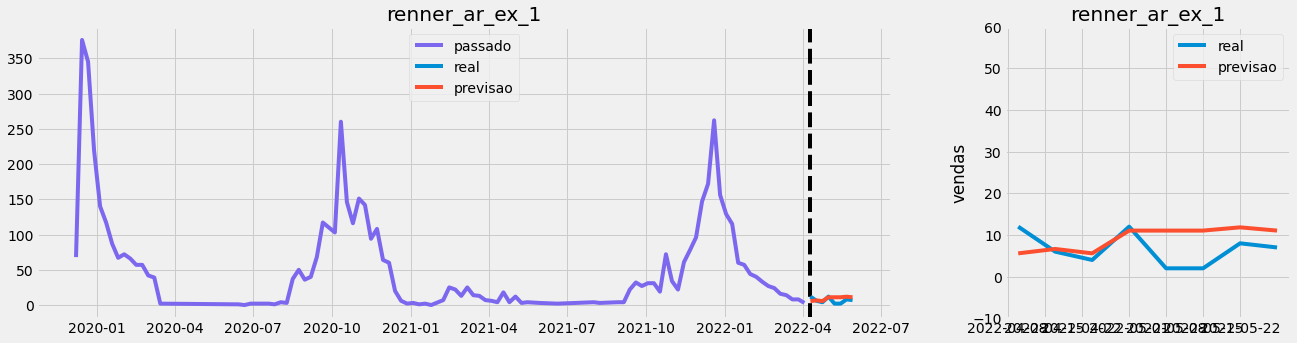

renner_br_sc_41
--------------
MSE: 37.25
RMSE: 6.1
MAE: 4.87


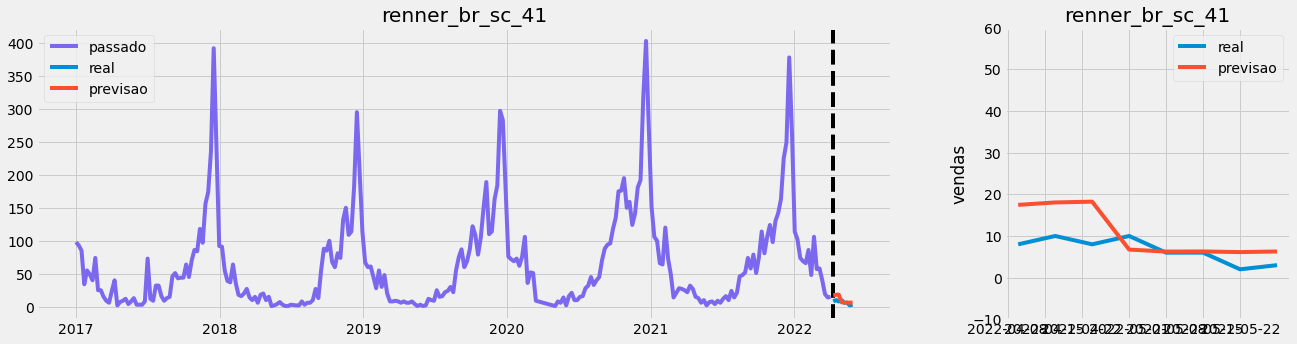

renner_br_sp_55
--------------
MSE: 53.53
RMSE: 7.32
MAE: 5.48


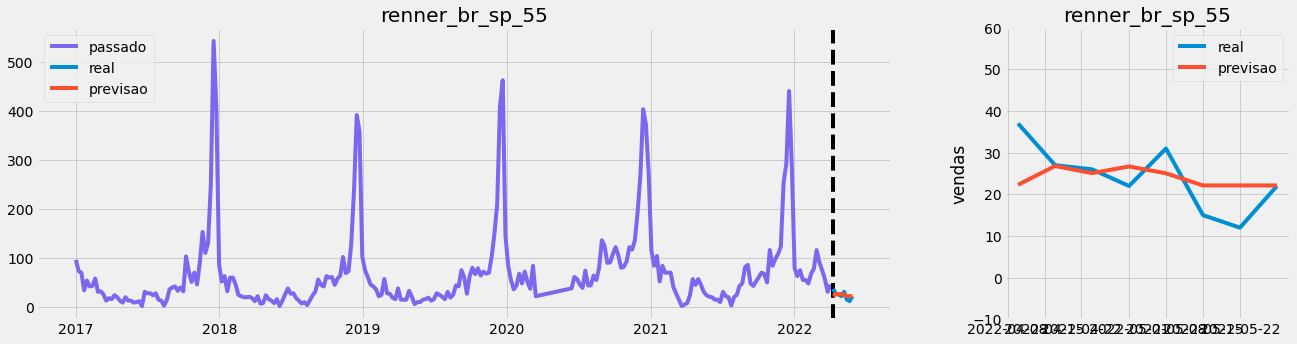

renner_br_pr_76
--------------
MSE: 43.69
RMSE: 6.61
MAE: 5.52


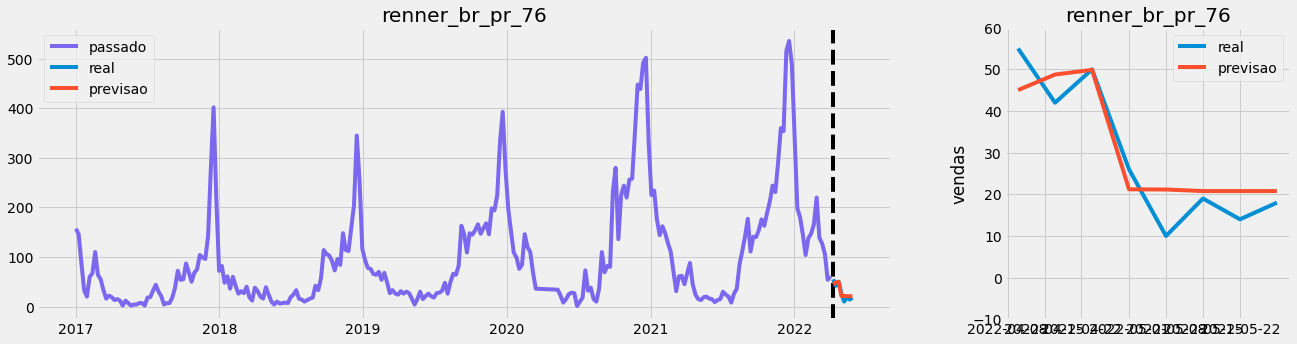

In [149]:
lojas = df.groupby('loja')['abserror'].sum().sort_values().keys()
a = 0
for i in lojas:
    df_loja = df.loc[df.loja==i]
    df_loja_past = df_past.loc[df_past.loja==i]
    if len(df_loja) > 7:
        print(i)
        print('-'*14)
        plot_diagnostics(df_loja.venda, df_loja.ypred)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [3, 1]})
        ax1.plot(df_loja_past.index, df_loja_past.venda, color='mediumslateblue', label='passado')
        ax1.axvline(pd.to_datetime('2022-04-9'), color='k', linestyle='--')
        ax1.plot(df_loja.index, df_loja.venda, label='real')
        ax1.plot(df_loja.index, df_loja.ypred, label='previsao')
        ax1.set_title(i)
        ax1.legend()
        ax2.plot(df_loja.index, df_loja.venda, label='real')
        ax2.plot(df_loja.index, df_loja.ypred, label='previsao')
        ax2.set_title(i)
        ax2.set_ylabel('vendas')
        ax2.set_ylim(-10, 60)
        ax2.legend()
        plt.show()
        a += 1
    else:
        pass
    if a == 10:
        break

### Observações:
- As lojas físicas tem uma sazonalidade anual bem forte, o produto em questão é muito vendido na época do natal
- As previsões são relativamentes próximas, o erro fica por volta de 5 vendas (para mais ou para menos)

### Previsões das lojas web

renner_br_rj_81
--------------
MSE: 1195508.73
RMSE: 1093.39
MAE: 963.37


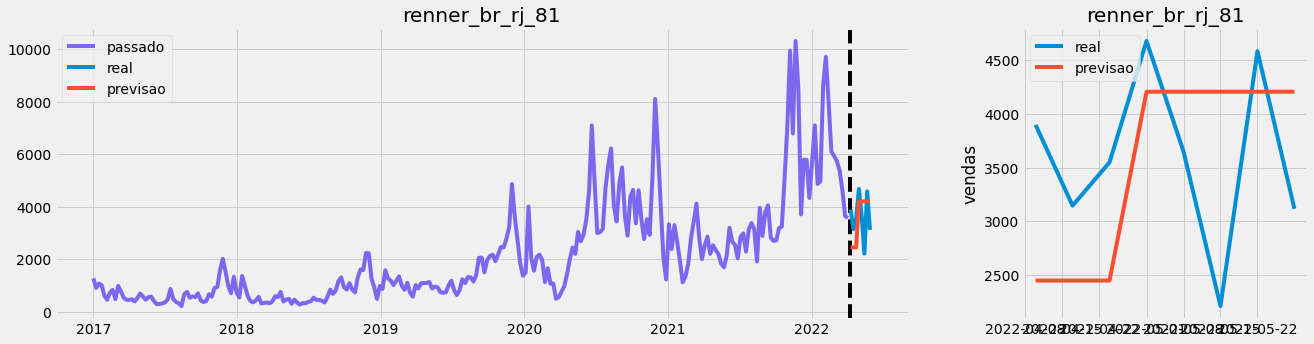

renner_br_sp_192
--------------
MSE: 140347.13
RMSE: 374.63
MAE: 332.06


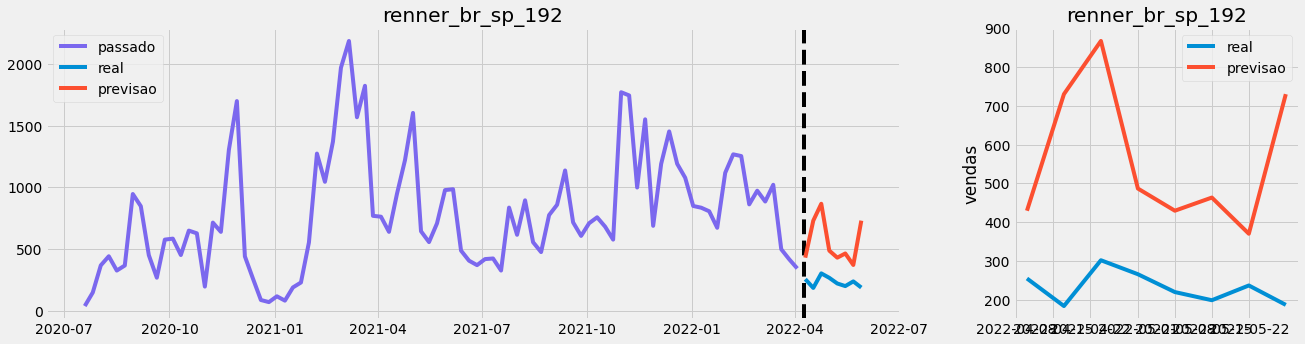

In [150]:
for i in df.loc[df.tipo_loja=='web'].loja.unique():
    df_loja = df.loc[df.loja==i]
    df_loja_past = df_past.loc[df_past.loja==i]
    print(i)
    print('-'*14)
    plot_diagnostics(df_loja.venda, df_loja.ypred)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [3, 1]})
    ax1.plot(df_loja_past.index, df_loja_past.venda, color='mediumslateblue', label='passado')
    ax1.axvline(pd.to_datetime('2022-04-9'), color='k', linestyle='--')
    ax1.plot(df_loja.index, df_loja.venda, label='real')
    ax1.plot(df_loja.index, df_loja.ypred, label='previsao')
    ax1.set_title(i)
    ax1.legend()
    ax2.plot(df_loja.index, df_loja.venda, label='real')
    ax2.plot(df_loja.index, df_loja.ypred, label='previsao')
    ax2.set_title(i)
    ax2.set_ylabel('vendas')
    ax2.legend()
    plt.show()

### Observações
- As lojas web não seguem nenhum tipo da sazonalidade aparente
- Elas vendem muito mais que a maioria das lojas físicas
- Pelo fato de não serem estacionárias, o modelo não tem um bom desempenho na previsão das vendas

### Considerações Finais
- A execução do projeto foi extramamente desafiadora, principalmente pela falta de conhecimento em séries temporais pelo grupo.
- Os resultados finais não ficaram muito bons. Usar um modelo único para prever para todas as lojas faz com que as previsões não sejam tão acertivas. O ideal seria criar um modelo para cada loja. 
- Uma opção seria usar Deep Learning, talvez os resultados fiquem melhores.  